<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_PC_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> B) AR + PC Regression <h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Mounted at /content/drive


In [3]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [4]:
data.shape, CPI.shape

((759, 104), (758, 3))

In [5]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [6]:
data = data.drop([758])

In [7]:
data.isna().sum()

sasdate            0
RPI                0
W875RX1            0
DPCERA3M086SBEA    0
RETAILx            0
                  ..
DSERRG3M086SBEA    0
CES0600000008      0
CES2000000008      0
CES3000000008      0
INVEST             0
Length: 104, dtype: int64

In [8]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [9]:
data.shape

(758, 104)

In [10]:
data_variables = data.drop(columns = ["sasdate"]).reset_index(drop=True)
data_variables.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.0223

In [11]:
data.shape, CPI.shape

((758, 104), (758, 3))

In [12]:
date = CPI["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
753,2021-12-01
754,2022-01-01
755,2022-02-01
756,2022-03-01


In [13]:
CPI_diff_df = CPI.drop(columns = ["CPIAUCSL", "sasdate"])

In [14]:
CPI_diff_df.head()

,CPIAUCSL_diff
0,-0.000691
1,0.001381
2,0.001721
3,0.000339
4,-0.001032


In [15]:
CPI_data = pd.merge(CPI_diff_df, data_variables, left_index = True, right_index = True)
CPI_data

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.000000,0.000997,0.007930,9.099837e-06,0.000000,1.064486e-05,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,6.502945e-05
1,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.000000,0.001210,-0.005142,0.000000e+00,0.000009,0.000000e+00,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,5.224170e-04
2,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.000000,0.001350,-0.006414,0.000000e+00,0.000009,0.000000e+00,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,4.296503e-06
3,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.5606

Let's check the variance distribution for each variable.

(array([1.21118846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17591112e-05]),
 array([3.55130748e-10, 8.17696545e+02, 1.63539309e+03, 2.45308963e+03,
        3.27078618e+03, 4.08848272e+03, 4.90617927e+03, 5.72387581e+03,
        6.54157236e+03, 7.35926890e+03, 8.17696545e+03, 8.99466199e+03,
        9.81235853e+03, 1.06300551e+04, 1.14477516e+04, 1.22654482e+04]),
 <a list of 15 Patch objects>)

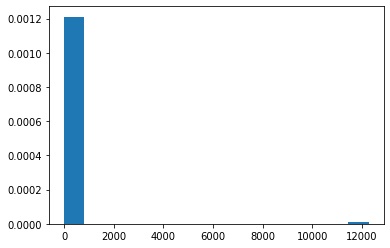

In [16]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

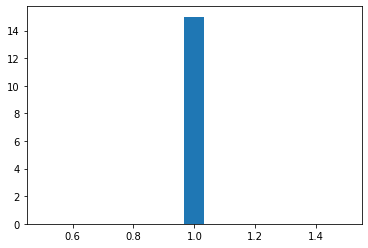

In [17]:
scaler = StandardScaler()
scaler.fit(CPI_data)
CPI_data_st = scaler.transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [18]:
CPI_data_df = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_df


,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.258455,0.108583,0.193494,0.906406,0.161428,1.708178,1.151487,0.607606,0.542204,0.090167,1.061919,0.575036,2.326189,2.269714,1.334968,1.395448,-0.139663,-0.712616,1.473948,-1.721245,-0.607043,-0.222529,-0.993786,-0.140494,-0.054644,-1.373790,-0.879914,-1.245373,-0.243808,0.435923,0.737411,-0.660331,-0.520031,1.305124,1.472550,0.718124,0.277493,0.505487,0.434448,0.650888,-0.400881,0.008493,-0.906949,0.684372,-0.648127,0.633820,1.880358,1.445484,-0.611358,0.149388,1.037944,1.901051,-0.037838,-0.218580,0.275844,-0.086402,-0.080429,-27.512535,-0.195628,0.480564,-0.592245,-0.630244,-0.093484,-0.281388,0.109777,0.447258,-0.150965,-0.211325,0.096329,0.098385,1.010108,1.326117,1.386022,0.606254,0.299797,-0.182066,-0.298562,0.093097,0.063242,0.093762,0.567089,-0.349974,-0.415682,-0.293982,-0.321401,-0.201599,-0.418018,-0.259179,-0.217700,-0.126516,-0.346324,-0.294710,-0.065931,-0.569256,-0.480858,-0.565951,-0.592904,-0.441750,-0.330511,-0.656172,0.026664,-0.265273,0.008753,-0.277803
1,0.511228,0.313990,0.805420,0.794293,0.225398,1.206603,0.409919,0.264115,-0.147245,0.526848,-0.780682,0.428611,1.881897,1.926443,1.128413,1.162602,0.127988,1.121675,1.224186,1.596671,1.176390,-0.682139,-0.258032,-0.672483,-0.726815,-0.833848,-0.284880,-1.006813,-0.728833,0.800472,1.413122,0.009849,0.910253,1.584521,1.845901,0.716290,0.428575,0.770772,0.685774,1.179223,1.078754,0.188542,-0.445148,1.384444,-0.512974,0.540381,1.766551,1.139111,-0.644327,0.374570,0.457942,1.946206,-0.037990,-0.146780,0.628604,-0.142053,-0.083000,0.036293,-0.186410,-0.180152,0.540046,0.518778,0.742048,0.248350,0.007615,0.177921,0.103327,0.119407,-0.041874,-0.185894,0.623251,0.834293,0.989328,0.348965,0.085877,-0.382288,-0.503770,0.172528,0.063242,0.103739,-0.411573,-0.443053,-0.357499,-0.345572,-0.331092,-0.198692,-0.344023,-0.328912,-0.151815,-0.133104,-0.252434,0.110352,-0.580824,-0.569256,-0.480858,-0.565951,-0.612247,-0.399996,-0.327353,-0.610832,0.020776,-0.265273,1.636826,1.843727
2,0.637727,0.319252,0.754672,-0.733718,-0.261991,1.873827,1.245503,1.153644,1.329201,0.125520,1.966389,1.293361,2.010668,1.443524,2.446943,1.645410,0.050800,-0.276023,1.792707,0.894963,0.976084,-0.911944,-0.503283,0.245529,-1.807208,-2.344100,-2.674855,-1.021678,-0.479376,0.734408,1.565568,0.102817,2.083310,1.379051,1.621342,0.573148,0.228769,0.320537,1.065941,-1.216544,0.887185,-0.028888,-0.137281,0.684372,-0.377821,0.479311,1.328302,1.007219,-0.432527,0.473540,0.179135,1.140810,-0.038076,-0.247723,0.002246,-0.124489,-0.080326,0.036595,0.013207,0.448268,0.303225,0.351538,0.324282,0.368745,0.365183,0.275862,0.421194,0.486887,0.464872,0.051005,0.608923,0.807707,0.923212,0.326263,0.067002,-0.413902,-0.578846,0.080792,0.063242,0.110344,-0.506733,-0.443053,-0.357499,-0.345572,-0.321483,-0.201599,-0.399632,-0.259179,-0.218148,-0.828122,-0.346324,-0.294710,-0.070389,-0.238317,-0.480858,-0.565951,-0.445394,-0.417803,-0.328616,-0.119930,0.014970,0.215006,-0.007133,-0.559505
3,0.124012,0.259160,0.684083,1.098180,0.192646,1.270393,0.634680,0.696171,0.302525,0.550100,-0.167456,1.644133,1.865382,1.679344,0.623430,1.015758

In [19]:
CPI_data_df.shape

(758, 104)

In [20]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for col in CPI_data_df.columns:
  for i in lags:
    CPI_data_df[col + "_lag_" + str(i)] = CPI_data_df[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [21]:
CPI_data_df.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUEL

In [22]:
CPI_data_df.shape

(758, 1352)

In [23]:
CPI_data_df = CPI_data_df.dropna()
CPI_data_df.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
12      -0.507178 -0.120676 -0.246873         0.199983 -0.067127 -1.082137   
13       1.633489 -0.057688 -0.247010         1.336531 -0.370639 -1.090074   
14      -1.260081  0.066440  0.193645         1.490433  1.337510 -0.986155   
15       0.123193 -0.017262  0.002468        -2.689626 -1.252681 -0.314399   
16      -1.258254 -0.149777 -0.437147        -0.333302 -0.387231 -1.447959   

     IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
12 -0.769906 -0.504828 -1.227607 -0.498429 -1.497280  0.182210 -1.220640   
13 -0.542315 -0.293860 -0.038622 -0.686691  1.015499 -0.065520 -1.502182   
14  0.032327 -0.081781  0.501599 -0.107770  1.150312 -0.807832 -2.070344   
15  0.375340  0.445490  0.390301  0.220519  0.269149 -0.002642 -0.908649   
16 -1.346384 -1.245638 -0.792669 -0.399341 -0.895633 -0.938836 -1.475982   

      IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
12 -1.047763 -0.652906  -0.856204  -0.098680  0.428691 -1.120904 -0.431782   
13 -1.875123 -0.095712  -1.252220   0.985126  0.423644 -1.614638 -2.924764   
14 -2.113563 -0.876921  -0.869614  -0.028784  1.367487 -1.158711  5.080931   
15 -0.882338 -0.000900  -0.676599  -0.407816 -1.385745 -0.928798 -0.156422   
16 -1.897970 -0.058570  -1.180282   0.109753 -0.277958 -1.471445  1.035377   

      CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
12  0.441505 -0.911944 -0.503283 -1.434310  -0.126798 -1.300707  -0.901704   
13 -2.338984  1.386107 -0.135406  1.603146   0.910126  2.006530   2.361663   
14  2.748537 -0.452334 -0.503283  0.424040  -1.281453 -1.049453  -1.123031   
15  0.042496 -0.222529 -0.871160 -0.109381   0.789766 -1.803058  -1.336806   
16  0.071376  0.696691 -0.012780  0.117203   1.092627  1.052191   1.182752   

    UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
12 -1.100027 -0.170659  0.503016  0.865660       0.406131  0.865932  0.846157   
13  0.332094  1.176278 -0.415108 -1.831908      -0.116882 -5.512409 -0.565573   
14 -0.289779 -0.265556  0.867993  0.550707       0.309877  3.776643 -0.515637   
15 -1.396846  0.513572 -1.270501 -0.585514      -0.544638  0.410424 -0.789861   
16  0.230898  0.127908 -0.624852 -1.076944      -0.285712 -0.795187 -1.110487   

     DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
12  0.973654  0.391199  0.302488  0.361504  0.196037  0.428635  1.022516   
13 -0.771230  0.043028  0.529708 -0.477481  0.141826 -0.349042  0.479925   
14 -0.804027  0.286529  1.061726  2.560335  0.811230  2.402287  0.476442   
15 -1.006339 -0.130878 -1.563144 -2.363371 -0.902074 -2.193190 -0.237978   
16 -1.270356 -0.549461 -0.265044 -0.424636 -0.700689 -0.268232  0.116585   

      USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
12  0.281073      -0.906949 -1.415846 -0.648127  0.295465  1.275277  0.957409   
13  6.545473      -1.214816 -0.715773 -1.053585 -0.697767 -0.193646 -0.536824   
14 -0.079916      -0.753015 -2.815991 -1.053585 -0.206360  0.769976  0.270540   
15 -3.920241      -1.060883  2.084516 -0.918432 -0.252305  0.736668  0.352782   
16 -0.389730      -1.214816 -1.415846 -1.188737 -0.314588  0.657105  0.546883   

      HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
12 -0.752074  0.301581 -0.178830 -2.589480 -0.038066 -0.301164 -0.599559   
13 -1.182517  0.029319 -0.372595 -2.532493 -0.038066 -0.251121  0.064329   
14 -0.898993 -0.070745 -0.364166 -2.162575 -0.038038 -0.262407 -0.791349   
15 -0.956711 -0.219187  0.205091 -1.446505 -0.038076 -0.262627 -0.180383   
16 -1.342027 -0.148312  0.378099 -0.827495 -0.038076 -0.178681  0.097510   

    BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
12 -0.002891 -0.065714   0.036043 -0.173072 -0.578216 -1.267899    -1.392217   
13 -0.142043 -0.082904   0.036645 -0.147961 -0.550715 -0.545187    -0.589896   
14 -0.138489

In [24]:
CPI_data_df.shape

(746, 1352)

In [25]:
CPI_data_df = CPI_data_df.reset_index(drop = True)
CPI_data_df.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
0      -0.507178 -0.120676 -0.246873         0.199983 -0.067127 -1.082137   
1       1.633489 -0.057688 -0.247010         1.336531 -0.370639 -1.090074   
2      -1.260081  0.066440  0.193645         1.490433  1.337510 -0.986155   
3       0.123193 -0.017262  0.002468        -2.689626 -1.252681 -0.314399   
4      -1.258254 -0.149777 -0.437147        -0.333302 -0.387231 -1.447959   

    IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
0 -0.769906 -0.504828 -1.227607 -0.498429 -1.497280  0.182210 -1.220640   
1 -0.542315 -0.293860 -0.038622 -0.686691  1.015499 -0.065520 -1.502182   
2  0.032327 -0.081781  0.501599 -0.107770  1.150312 -0.807832 -2.070344   
3  0.375340  0.445490  0.390301  0.220519  0.269149 -0.002642 -0.908649   
4 -1.346384 -1.245638 -0.792669 -0.399341 -0.895633 -0.938836 -1.475982   

     IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
0 -1.047763 -0.652906  -0.856204  -0.098680  0.428691 -1.120904 -0.431782   
1 -1.875123 -0.095712  -1.252220   0.985126  0.423644 -1.614638 -2.924764   
2 -2.113563 -0.876921  -0.869614  -0.028784  1.367487 -1.158711  5.080931   
3 -0.882338 -0.000900  -0.676599  -0.407816 -1.385745 -0.928798 -0.156422   
4 -1.897970 -0.058570  -1.180282   0.109753 -0.277958 -1.471445  1.035377   

     CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
0  0.441505 -0.911944 -0.503283 -1.434310  -0.126798 -1.300707  -0.901704   
1 -2.338984  1.386107 -0.135406  1.603146   0.910126  2.006530   2.361663   
2  2.748537 -0.452334 -0.503283  0.424040  -1.281453 -1.049453  -1.123031   
3  0.042496 -0.222529 -0.871160 -0.109381   0.789766 -1.803058  -1.336806   
4  0.071376  0.696691 -0.012780  0.117203   1.092627  1.052191   1.182752   

   UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
0 -1.100027 -0.170659  0.503016  0.865660       0.406131  0.865932  0.846157   
1  0.332094  1.176278 -0.415108 -1.831908      -0.116882 -5.512409 -0.565573   
2 -0.289779 -0.265556  0.867993  0.550707       0.309877  3.776643 -0.515637   
3 -1.396846  0.513572 -1.270501 -0.585514      -0.544638  0.410424 -0.789861   
4  0.230898  0.127908 -0.624852 -1.076944      -0.285712 -0.795187 -1.110487   

    DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
0  0.973654  0.391199  0.302488  0.361504  0.196037  0.428635  1.022516   
1 -0.771230  0.043028  0.529708 -0.477481  0.141826 -0.349042  0.479925   
2 -0.804027  0.286529  1.061726  2.560335  0.811230  2.402287  0.476442   
3 -1.006339 -0.130878 -1.563144 -2.363371 -0.902074 -2.193190 -0.237978   
4 -1.270356 -0.549461 -0.265044 -0.424636 -0.700689 -0.268232  0.116585   

     USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
0  0.281073      -0.906949 -1.415846 -0.648127  0.295465  1.275277  0.957409   
1  6.545473      -1.214816 -0.715773 -1.053585 -0.697767 -0.193646 -0.536824   
2 -0.079916      -0.753015 -2.815991 -1.053585 -0.206360  0.769976  0.270540   
3 -3.920241      -1.060883  2.084516 -0.918432 -0.252305  0.736668  0.352782   
4 -0.389730      -1.214816 -1.415846 -1.188737 -0.314588  0.657105  0.546883   

     HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
0 -0.752074  0.301581 -0.178830 -2.589480 -0.038066 -0.301164 -0.599559   
1 -1.182517  0.029319 -0.372595 -2.532493 -0.038066 -0.251121  0.064329   
2 -0.898993 -0.070745 -0.364166 -2.162575 -0.038038 -0.262407 -0.791349   
3 -0.956711 -0.219187  0.205091 -1.446505 -0.038076 -0.262627 -0.180383   
4 -1.342027 -0.148312  0.378099 -0.827495 -0.038076 -0.178681  0.097510   

   BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
0 -0.002891 -0.065714   0.036043 -0.173072 -0.578216 -1.267899    -1.392217   
1 -0.142043 -0.082904   0.036645 -0.147961 -0.550715 -0.545187    -0.589896   
2 -0.138489 -0.084594   0.036396  0.021813 -0.610737  0.197516

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. Therefore, 492 PCA's are applied to the data and 492 models are run afterwards.
Principal Component Analysis is applied per shift and the selected components are those necessary to explain 60% of the variance in the data. Subsequently, the CPI is regressed in the PCA's chosen by the criterion. Remembering that the PCA's are applied to the original data and to the time lags from 1 to 12 periods, including the CPI time lags.
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the PC's importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the PC coefficient and the eigenvalue of the respective eigenvector that generated it.

In [ ]:
data = CPI_data_df.values
train, test = data[0:492], data[492:len(data)]
history = [x for x in train]
predictions = list()
importances = list()
for t in range(len(test)):
  history = history[-492:]
  y = [item[0] for item in history]
  X = [item[1:] for item in history]
  #PCA
  X_pca = PCA().fit_transform(X)
  pca_out = PCA().fit(X)
  var_ratio_cumsum = np.cumsum(pca_out.explained_variance_ratio_)
  limit_var = np.where(var_ratio_cumsum <= 0.60)
  n = np.array(limit_var)[0]
  pcs_number = np.where(n == n.max())[0][0]
  X_pca_new = pd.DataFrame(X_pca[:, 0:pcs_number])
  #LinearRegression
  model = LinearRegression()
  model.fit(X_pca_new, y)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  X_pred_feat_pca = pca_out.transform(X_pred_features)
  X_pred_pca_new = pd.DataFrame(X_pred_feat_pca[:, 0:pcs_number])
  yhat = model.predict(X_pred_pca_new)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #Variables Importances
  coefs = model.coef_.reshape(1, -1)[0]
  coefs_sub = np.absolute(coefs[0: pcs_number])
  eigen_values = pca_out.explained_variance_[0: pcs_number]
  importance = np.multiply(coefs_sub, eigen_values)
  importances.append(importance)
  print('predicted=%f, observed=%f, window=%f, pcs_number=%f' % (yhat, obs[0], (len(history)-1), pcs_number))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

In [27]:
len(predictions), len(observed), len(test), len(data)

(254, 254, 254, 746)

In [28]:
observed = np.array(observed)
predictions = np.array(predictions)
observed = observed.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)
observed.shape, predictions.shape

((254, 1), (254, 1))

In [29]:
CPI_data_st.shape

(758, 104)

In [30]:
observed_copies =  np.repeat(observed, CPI_data_st.shape[1], axis = -1)
observed_real = scaler.inverse_transform(observed_copies)[:, 0]

In [31]:
predictions_copies =  np.repeat(predictions, CPI_data_st.shape[1], axis = -1)
predictions_real = scaler.inverse_transform(predictions_copies)[:, 0]

In [32]:
date = date[504: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-03-01
1,2001-04-01
2,2001-05-01
3,2001-06-01
4,2001-07-01


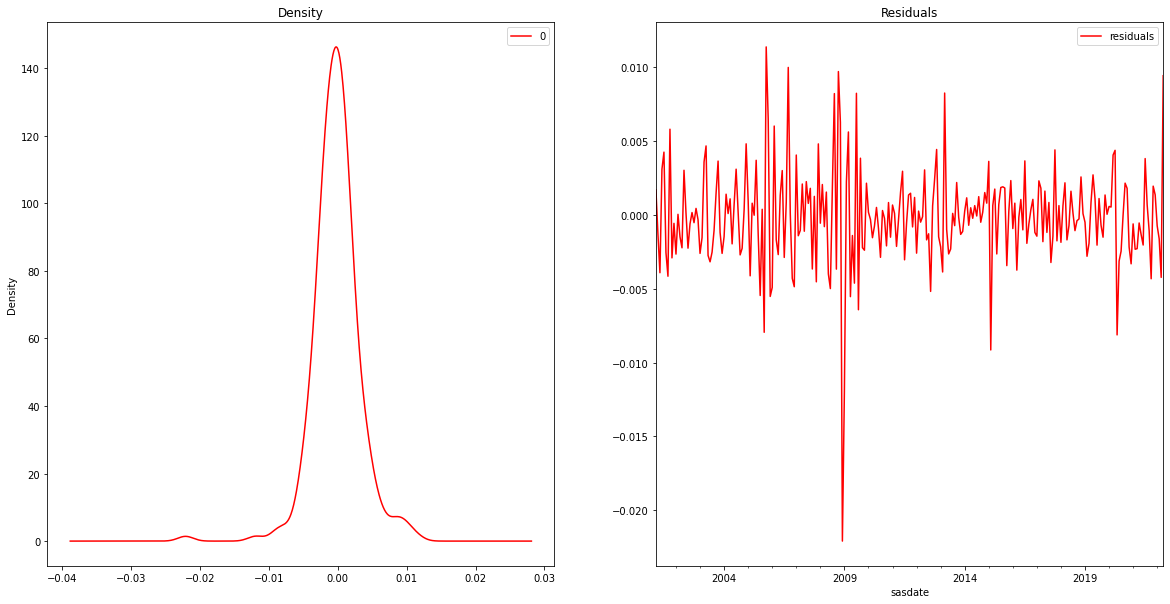

In [33]:
pred_df = pd.DataFrame(predictions_real)
observed_df = pd.DataFrame(observed_real)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

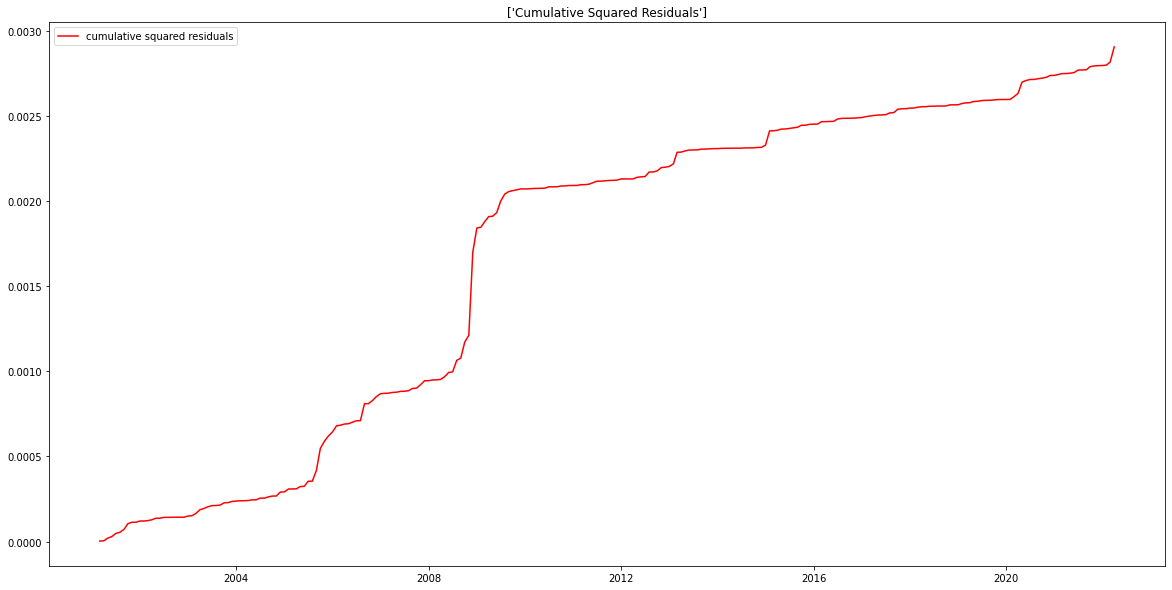

In [34]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [35]:
pred = pd.DataFrame(predictions_real)
observedd = pd.DataFrame(observed_real)

In [36]:
pred.shape, observedd.shape, date.shape

((254, 1), (254, 1), (254, 1))

In [37]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [38]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])
df.head()

,0_x,0_y
sasdate,,
2001-03-01,-0.000006,-0.001705
2001-04-01,-0.000174,0.001133
2001-05-01,-0.000538,0.003375
2001-06-01,0.000273,-0.002825
2001-07-01,0.000312,-0.003942


In [39]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-03-01,-0.000006,-0.001705
2001-04-01,-0.000174,0.001133
2001-05-01,-0.000538,0.003375
2001-06-01,0.000273,-0.002825
2001-07-01,0.000312,-0.003942


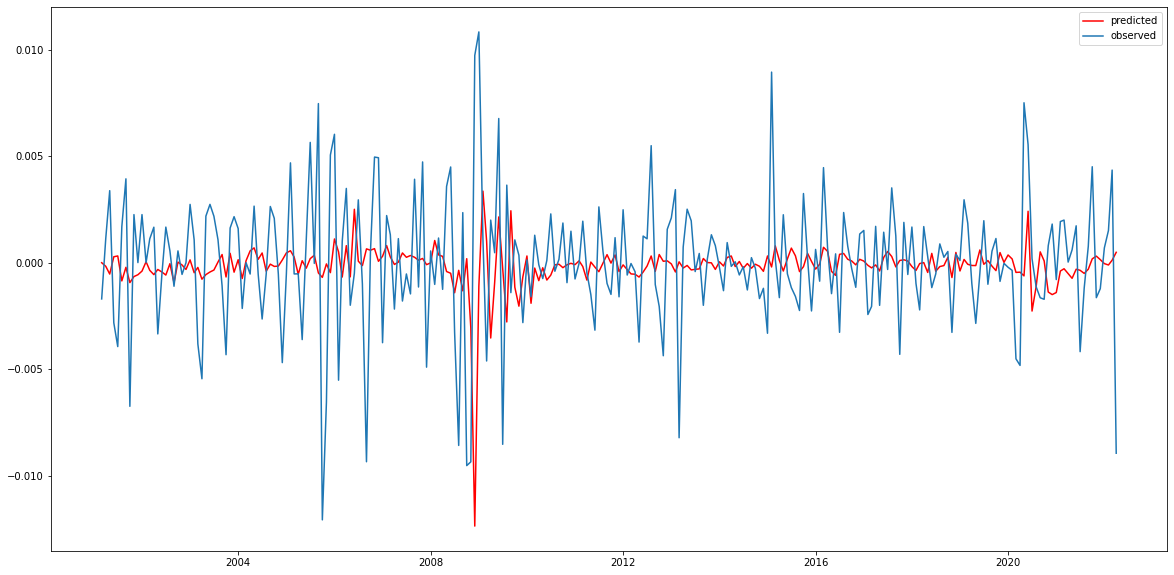

In [40]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

In [54]:
mse = mean_squared_error(observed_real, predictions_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(observed_real, predictions_real)
print('%f' % mse), print('%f' % mae), print('%f' % rmse)

0.000011
0.002331
0.003382


(None, None, None)

This graph above shows the true values of the CPI variable and its prediction according to the estimated PCR Autoregressive Models. We can see a poor performance of the model, where it presented an MSE of 0.000011, RMSE of 0.0023 and a MAE of 0.0032.

In [43]:
pred_pc_ar = df["pred"].copy()
pred_pc_ar.head()

sasdate
2001-03-01   -0.000006
2001-04-01   -0.000174
2001-05-01   -0.000538
2001-06-01    0.000273
2001-07-01    0.000312
Name: pred, dtype: float64

In [44]:
pred_pc_ar.shape

(254,)

In [45]:
pred_pc_ar.to_csv("/content/drive/MyDrive/Trabalho-1/pred_pc_ar.csv", index = False)

<h3> b) <h3>

The maximum number of PC's that were selected in each estimation was 41. Therefore, we used only 41 PC's for analysis.

In [46]:
importances_df = pd.DataFrame(importances)
importances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.417168,0.024225,0.124671,0.183203,0.366645,0.183833,0.211234,0.257285,0.063639,0.204478,0.016400,0.068849,0.120787,0.080118,0.119770,0.085766,0.073632,0.068863,0.092870,0.024168,0.039019,0.156097,0.027008,0.031446,0.112889,0.010026,0.177692,0.029660,0.210573,0.058086,0.251072,0.231960,0.032997,0.086395,0.076386,0.044493,0.155535,0.188484,0.080072,NaN
1,0.424439,0.025524,0.112137,0.198884,0.368800,0.186232,0.193804,0.276616,0.087486,0.189816,0.015437,0.084040,0.116982,0.080048,0.076903,0.102837,0.065807,0.072949,0.105920,0.020612,0.002033,0.138721,0.120475,0.009302,0.130619,0.194197,0.030506,0.050864,0.006861,0.307266,0.020752,0.230144,0.000169,0.104486,0.070055,0.061174,0.143127,0.195644,NaN,NaN
2,0.404837,0.019767,0.111244,0.193123,0.378963,0.179668,0.194865,0.276802,0.078683,0.217890,0.009627,0.112025,0.098385,0.106853,0.126342,0.014336,0.054789,0.124676,0.009363,0.015271,0.051798,0.162529,0.026644,0.038742,0.063505,0.174211,0.082415,0.124447,0.183323,0.257730,0.004142,0.210520,0.000477,0.146939,0.044296,0.018632,0.105831,0.204784,NaN,NaN
3,0.414925,0.018885,0.139205,0.193275,0.349427,0.186550,0.192073,0.277262,0.098016,0.182185,0.005136,0.102346,0.104933,0.070887,0.081555,0.019682,0.034852,0.077386,0.056415,0.018917,0.055032,0.025359,0.188162,0.003459,0.046191,0.226693,0.003367,0.093165,0.278230,0.068479,0.145124,0.220864,0.013687,0.111085,0.039057,0.044616,0.121345,0.155033,NaN,NaN
4,0.418412,0.024603,0.120004,0.188305,0.353004,0.185015,0.209915,0.243147,0.135577,0.172096,0.005053,0.098683,0.108231,0.076218,0.067942,0.055355,0.014739,0.096855,0.022187,0.028441,0.047171,0.024206,0.185924,0.015028,0.071872,0.138748,0.223261,0.142117,0.212657,0.071567,0.241379,0.130742,0.009436,0.107404,0.047604,0.051061,0.204542,0.093528,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.211115,0.161067,0.038022,0.329042,0.181945,0.534096,0.594566,0.330834,0.533672,0.206393,0.434178,0.103611,0.017948,0.083677,0.208590,0.067931,0.137086,0.082204,0.015541,0.145668,0.160156,0.043754,0.191726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,0.232216,0.084887,0.072680,0.282343,0.156848,0.516919,0.597152,0.313738,0.555001,0.232955,0.448847,0.098256,0.010398,0.078364,0.215091,0.062461,0.164601,0.089946,0.014622,0.230388,0.136338,0.126306,0.117203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,0.239340,0.019563,0.138926,0.247349,0.098290,0.490758,0.585338,0.284372,0.565823,0.268542,0.462719,0.097242,0.005225,0.078285,0.191261,0.092213,0.164822,0.086340,0.016324,0.215420,0.106885,0.166182,0.017273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,0.240270,0.035462,0.139328,0.284562,0.011614,0.457193,0.571357,0.211853,0.576341,0.300319,0.467879,0.094406,0.011902,0.079149,0.167900,0.094632,0.180687,0.057969,0.004857,0.211390,0.205709,0.091562,0.144787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
importances_df["sum"] = importances_df.sum(axis = 1)
importances_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,sum
0,0.417168,0.024225,0.124671,0.183203,0.366645,0.183833,0.211234,0.257285,0.063639,0.204478,0.016400,0.068849,0.120787,0.080118,0.119770,0.085766,0.073632,0.068863,0.092870,0.024168,0.039019,0.156097,0.027008,0.031446,0.112889,0.010026,0.177692,0.029660,0.210573,0.058086,0.251072,0.231960,0.032997,0.086395,0.076386,0.044493,0.155535,0.188484,0.080072,NaN,4.787493
1,0.424439,0.025524,0.112137,0.198884,0.368800,0.186232,0.193804,0.276616,0.087486,0.189816,0.015437,0.084040,0.116982,0.080048,0.076903,0.102837,0.065807,0.072949,0.105920,0.020612,0.002033,0.138721,0.120475,0.009302,0.130619,0.194197,0.030506,0.050864,0.006861,0.307266,0.020752,0.230144,0.000169,0.104486,0.070055,0.061174,0.143127,0.195644,NaN,NaN,4.621667
2,0.404837,0.019767,0.111244,0.193123,0.378963,0.179668,0.194865,0.276802,0.078683,0.217890,0.009627,0.112025,0.098385,0.106853,0.126342,0.014336,0.054789,0.124676,0.009363,0.015271,0.051798,0.162529,0.026644,0.038742,0.063505,0.174211,0.082415,0.124447,0.183323,0.257730,0.004142,0.210520,0.000477,0.146939,0.044296,0.018632,0.105831,0.204784,NaN,NaN,4.628475
3,0.414925,0.018885,0.139205,0.193275,0.349427,0.186550,0.192073,0.277262,0.098016,0.182185,0.005136,0.102346,0.104933,0.070887,0.081555,0.019682,0.034852,0.077386,0.056415,0.018917,0.055032,0.025359,0.188162,0.003459,0.046191,0.226693,0.003367,0.093165,0.278230,0.068479,0.145124,0.220864,0.013687,0.111085,0.039057,0.044616,0.121345,0.155033,NaN,NaN,4.462859
4,0.418412,0.024603,0.120004,0.188305,0.353004,0.185015,0.209915,0.243147,0.135577,0.172096,0.005053,0.098683,0.108231,0.076218,0.067942,0.055355,0.014739,0.096855,0.022187,0.028441,0.047171,0.024206,0.185924,0.015028,0.071872,0.138748,0.223261,0.142117,0.212657,0.071567,0.241379,0.130742,0.009436,0.107404,0.047604,0.051061,0.204542,0.093528,NaN,NaN,4.642032


The importances are transformed to percentages.

In [48]:
for col in importances_df.columns[:-1]:
  importances_df[col] = (importances_df[col].abs()*100)/importances_df["sum"]
importances_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,sum
0,8.713706,0.506016,2.604101,3.826698,7.658387,3.839859,4.412204,5.374110,1.329274,4.271078,0.342569,1.438105,2.522978,1.673486,2.501728,1.791457,1.537997,1.438396,1.939855,0.504814,0.815027,3.260522,0.564140,0.656834,2.358000,0.209414,3.711592,0.619521,4.398403,1.213279,5.244330,4.845114,0.689232,1.804596,1.595528,0.929353,3.248768,3.937002,1.672525,NaN,4.787493
1,9.183680,0.552258,2.426332,4.303293,7.979800,4.029532,4.193379,5.985199,1.892952,4.107087,0.334014,1.818399,2.531167,1.732020,1.663975,2.225107,1.423871,1.578420,2.291814,0.445981,0.043988,3.001529,2.606745,0.201268,2.826236,4.201886,0.660068,1.100563,0.148451,6.648390,0.449008,4.979677,0.003658,2.260782,1.515791,1.323637,3.096859,4.233183,NaN,NaN,4.621667
2,8.746658,0.427080,2.403465,4.172499,8.187635,3.881787,4.210125,5.980413,1.699967,4.707596,0.208005,2.420348,2.125657,2.308605,2.729661,0.309743,1.183743,2.693673,0.202284,0.329941,1.119121,3.511492,0.575647,0.837037,1.372057,3.763895,1.780601,2.688735,3.960774,5.568355,0.089491,4.548370,0.010315,3.174684,0.957034,0.402552,2.286518,4.424438,NaN,NaN,4.628475
3,9.297290,0.423169,3.119198,4.330747,7.829663,4.180055,4.303804,6.212651,2.196255,4.082259,0.115074,2.293286,2.351251,1.588380,1.827409,0.441007,0.780944,1.734007,1.264102,0.423869,1.233119,0.568221,4.216168,0.077510,1.035002,5.079539,0.075451,2.087552,6.234352,1.534415,3.251808,4.948930,0.306691,2.489098,0.875158,0.999727,2.718999,3.473841,NaN,NaN,4.462859
4,9.013544,0.530007,2.585165,4.056529,7.604513,3.985650,4.522042,5.237944,2.920639,3.707337,0.108848,2.125859,2.331553,1.641910,1.463626,1.192481,0.317502,2.086482,0.477949,0.612692,1.016181,0.521450,4.005238,0.323748,1.548286,2.988953,4.809557,3.061518,4.581117,1.541727,5.199858,2.816488,0.203268,2.313736,1.025506,1.099977,4.406306,2.014816,NaN,NaN,4.642032


In [49]:
test = importances_df.sum(axis = 1) - importances_df["sum"]
test

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
249    100.0
250    100.0
251    100.0
252    100.0
253    100.0
Length: 254, dtype: float64

The number of PC's varies according to the estimation, so it is natural that the last ones have Na's values. To fix this we change Na's to zero.

In [50]:
importances_df = importances_df.fillna(0)
importances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,sum
0,8.713706,0.506016,2.604101,3.826698,7.658387,3.839859,4.412204,5.374110,1.329274,4.271078,0.342569,1.438105,2.522978,1.673486,2.501728,1.791457,1.537997,1.438396,1.939855,0.504814,0.815027,3.260522,0.564140,0.656834,2.358000,0.209414,3.711592,0.619521,4.398403,1.213279,5.244330,4.845114,0.689232,1.804596,1.595528,0.929353,3.248768,3.937002,1.672525,0.0,4.787493
1,9.183680,0.552258,2.426332,4.303293,7.979800,4.029532,4.193379,5.985199,1.892952,4.107087,0.334014,1.818399,2.531167,1.732020,1.663975,2.225107,1.423871,1.578420,2.291814,0.445981,0.043988,3.001529,2.606745,0.201268,2.826236,4.201886,0.660068,1.100563,0.148451,6.648390,0.449008,4.979677,0.003658,2.260782,1.515791,1.323637,3.096859,4.233183,0.000000,0.0,4.621667
2,8.746658,0.427080,2.403465,4.172499,8.187635,3.881787,4.210125,5.980413,1.699967,4.707596,0.208005,2.420348,2.125657,2.308605,2.729661,0.309743,1.183743,2.693673,0.202284,0.329941,1.119121,3.511492,0.575647,0.837037,1.372057,3.763895,1.780601,2.688735,3.960774,5.568355,0.089491,4.548370,0.010315,3.174684,0.957034,0.402552,2.286518,4.424438,0.000000,0.0,4.628475
3,9.297290,0.423169,3.119198,4.330747,7.829663,4.180055,4.303804,6.212651,2.196255,4.082259,0.115074,2.293286,2.351251,1.588380,1.827409,0.441007,0.780944,1.734007,1.264102,0.423869,1.233119,0.568221,4.216168,0.077510,1.035002,5.079539,0.075451,2.087552,6.234352,1.534415,3.251808,4.948930,0.306691,2.489098,0.875158,0.999727,2.718999,3.473841,0.000000,0.0,4.462859
4,9.013544,0.530007,2.585165,4.056529,7.604513,3.985650,4.522042,5.237944,2.920639,3.707337,0.108848,2.125859,2.331553,1.641910,1.463626,1.192481,0.317502,2.086482,0.477949,0.612692,1.016181,0.521450,4.005238,0.323748,1.548286,2.988953,4.809557,3.061518,4.581117,1.541727,5.199858,2.816488,0.203268,2.313736,1.025506,1.099977,4.406306,2.014816,0.000000,0.0,4.642032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,4.386515,3.346624,0.790018,6.836780,3.780426,11.097359,12.353795,6.874003,11.088537,4.288393,9.021287,2.152817,0.372923,1.738636,4.334046,1.411454,2.848343,1.708014,0.322907,3.026659,3.327697,0.909114,3.983652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.812822
250,4.800270,1.754748,1.502411,5.836471,3.242290,10.685525,12.344073,6.485461,11.472747,4.815547,9.278381,2.031112,0.214946,1.619917,4.446273,1.291170,3.402566,1.859320,0.302256,4.762479,2.818319,2.610937,2.422780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.837559
251,5.159871,0.421745,2.995059,5.332530,2.119015,10.580130,12.619156,6.130697,12.198421,5.789424,9.975636,2.096405,0.112639,1.687722,4.123345,1.988001,3.553351,1.861377,0.351917,4.644181,2.304315,3.582675,0.372387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.638491
252,5.176979,0.764083,3.002033,6.131308,0.250246,9.850908,12.310742,4.564682,12.418124,6.470812,10.081154,2.034117,0.256451,1.705381,3.617661,2.038986,3.893164,1.249026,0.104643,4.554706,4.432300,1.972839,3.119654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.641126


In [51]:
importances_df = importances_df.drop(columns = ["sum"])

In [52]:
importances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,8.713706,0.506016,2.604101,3.826698,7.658387,3.839859,4.412204,5.374110,1.329274,4.271078,0.342569,1.438105,2.522978,1.673486,2.501728,1.791457,1.537997,1.438396,1.939855,0.504814,0.815027,3.260522,0.564140,0.656834,2.358000,0.209414,3.711592,0.619521,4.398403,1.213279,5.244330,4.845114,0.689232,1.804596,1.595528,0.929353,3.248768,3.937002,1.672525,0.0
1,9.183680,0.552258,2.426332,4.303293,7.979800,4.029532,4.193379,5.985199,1.892952,4.107087,0.334014,1.818399,2.531167,1.732020,1.663975,2.225107,1.423871,1.578420,2.291814,0.445981,0.043988,3.001529,2.606745,0.201268,2.826236,4.201886,0.660068,1.100563,0.148451,6.648390,0.449008,4.979677,0.003658,2.260782,1.515791,1.323637,3.096859,4.233183,0.000000,0.0
2,8.746658,0.427080,2.403465,4.172499,8.187635,3.881787,4.210125,5.980413,1.699967,4.707596,0.208005,2.420348,2.125657,2.308605,2.729661,0.309743,1.183743,2.693673,0.202284,0.329941,1.119121,3.511492,0.575647,0.837037,1.372057,3.763895,1.780601,2.688735,3.960774,5.568355,0.089491,4.548370,0.010315,3.174684,0.957034,0.402552,2.286518,4.424438,0.000000,0.0
3,9.297290,0.423169,3.119198,4.330747,7.829663,4.180055,4.303804,6.212651,2.196255,4.082259,0.115074,2.293286,2.351251,1.588380,1.827409,0.441007,0.780944,1.734007,1.264102,0.423869,1.233119,0.568221,4.216168,0.077510,1.035002,5.079539,0.075451,2.087552,6.234352,1.534415,3.251808,4.948930,0.306691,2.489098,0.875158,0.999727,2.718999,3.473841,0.000000,0.0
4,9.013544,0.530007,2.585165,4.056529,7.604513,3.985650,4.522042,5.237944,2.920639,3.707337,0.108848,2.125859,2.331553,1.641910,1.463626,1.192481,0.317502,2.086482,0.477949,0.612692,1.016181,0.521450,4.005238,0.323748,1.548286,2.988953,4.809557,3.061518,4.581117,1.541727,5.199858,2.816488,0.203268,2.313736,1.025506,1.099977,4.406306,2.014816,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,4.386515,3.346624,0.790018,6.836780,3.780426,11.097359,12.353795,6.874003,11.088537,4.288393,9.021287,2.152817,0.372923,1.738636,4.334046,1.411454,2.848343,1.708014,0.322907,3.026659,3.327697,0.909114,3.983652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
250,4.800270,1.754748,1.502411,5.836471,3.242290,10.685525,12.344073,6.485461,11.472747,4.815547,9.278381,2.031112,0.214946,1.619917,4.446273,1.291170,3.402566,1.859320,0.302256,4.762479,2.818319,2.610937,2.422780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
251,5.159871,0.421745,2.995059,5.332530,2.119015,10.580130,12.619156,6.130697,12.198421,5.789424,9.975636,2.096405,0.112639,1.687722,4.123345,1.988001,3.553351,1.861377,0.351917,4.644181,2.304315,3.582675,0.372387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
252,5.176979,0.764083,3.002033,6.131308,0.250246,9.850908,12.310742,4.564682,12.418124,6.470812,10.081154,2.034117,0.256451,1.705381,3.617661,2.038986,3.893164,1.249026,0.104643,4.554706,4.432300,1.972839,3.119654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Text(0.5, 1.0, 'Percentage of the tree first PCs importances in each estimation (254).')

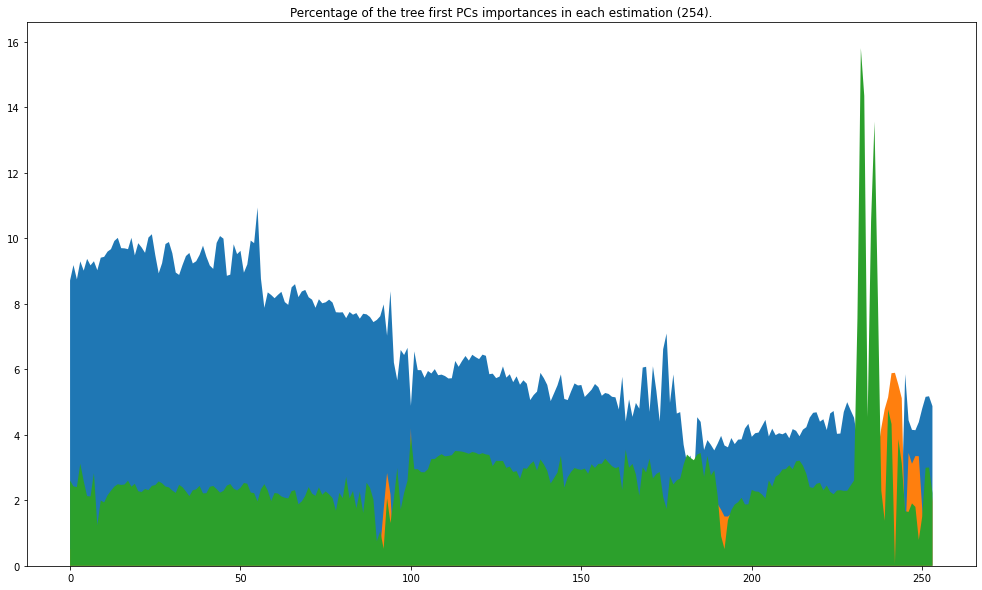

In [53]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

for pca in importances_df.columns[0:3]:
  plt.stackplot(range(0, 254), importances_df[pca])

plt.title('Percentage of the tree first PCs importances in each estimation (254).')